# Центральная предельная теорема своими руками.
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

код, генерирующий выборки и графики;

краткие описания каждого блока кода, объясняющие, что он делает;

необходимые графики (убедитесь, что на них подписаны оси);

выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;

выводы по результатам выполнения задания.

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from math import sqrt

%matplotlib inline

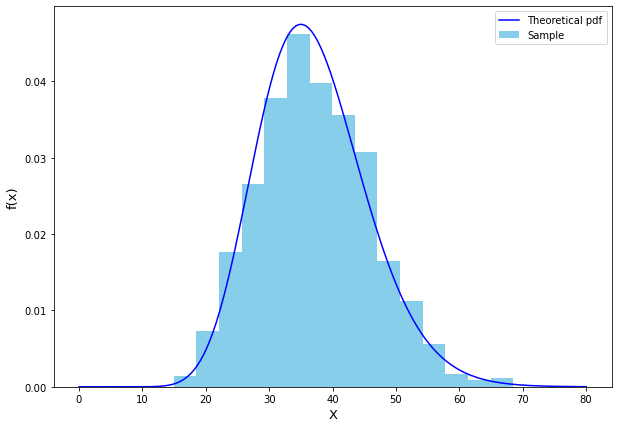

In [2]:
# Generating a sample from chi-square distribution.
k = 37
chi2_rv = sts.chi2(df=k)
chi2_sample = chi2_rv.rvs(size=1000)

# Calculating the theoretical probability density function.
x_values = np.linspace(0, 80, 160)
th_pdf = chi2_rv.pdf(x_values)

# Plot a histogram of the sample and a theoretical pdf of the distribution.
plt.figure(figsize=(10, 7))
plt.hist(chi2_sample, bins=15, density=True, color='skyblue', label='Sample')
plt.plot(x_values, th_pdf, color='blue', label='Theoretical pdf')
plt.xlabel('X', fontsize=13)
plt.ylabel('f(x)', fontsize=13)
plt.legend()

In [3]:
# Mean and variance of the source distribution.
mean = k
var = k * 2

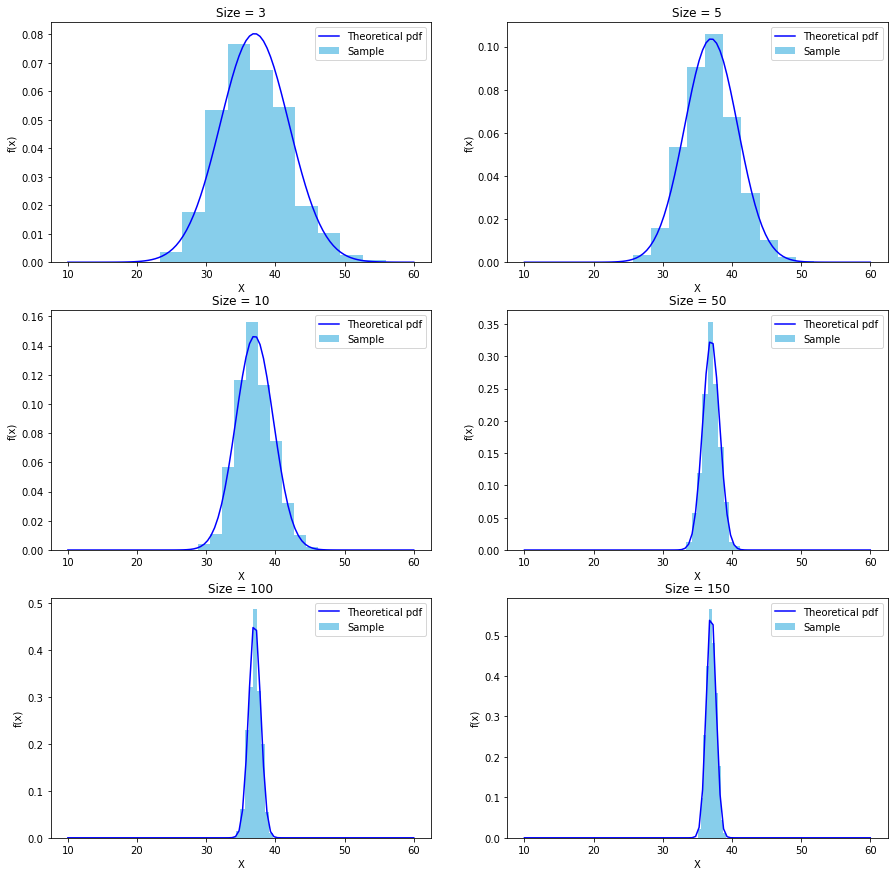

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

n = [3, 5, 10, 50, 100, 150]    # Size of sample.

for s, ax in zip(n, axs.flat):
    samples = [chi2_rv.rvs(size=s) for i in np.arange(1000)]    # Generating s-size samples.
    means = [np.mean(sample) for sample in samples]    # Calculating averages.
    ax.hist(means, density=True, color='skyblue', label='Sample')
    norm_rv = sts.norm(loc=mean, scale=sqrt(var/s))  # Creating normal distribution with variance = variance / size
    x = np.linspace(10, 60, 100)
    pdf = norm_rv.pdf(x)
    ax.plot(x, pdf, color='blue', label = 'Theoretical pdf')
    ax.set(xlabel='X', ylabel='f(x)', title='Size = %d' % (s))
    ax.legend()

### Conculsion
The distribution of sample averages is described fairly well by the normal distribution.  
With the sample size increases, the accuracy of the normal approximation increases